In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/work/american_housing_data.csv')
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [3]:
df.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,39981.000000,3.998100e+04,39981.000000,39981.000000,39981.000000,39981.000000,39981.000000,39979.000000,39981.000000,39981.000000
mean,64833.391336,6.227771e+05,3.171682,2.466572,1901.522723,37726.201996,2379.412483,110837.259861,36.435668,-98.080576
std,25614.601116,9.469793e+05,1.308796,1.323042,1211.307257,18672.647445,2946.574792,47309.055715,4.446862,15.061145
min,10013.000000,1.800000e+03,1.000000,1.000000,2.000000,0.000000,0.000000,27475.000000,25.729830,-122.826870
25%,40215.000000,2.650000e+05,3.000000,2.000000,1200.000000,24465.000000,902.400000,76640.000000,33.239850,-111.636310
50%,74136.000000,3.999000e+05,3.000000,2.000000,1639.000000,35049.000000,1588.700000,100405.000000,36.166620,-96.839680
75%,85730.000000,6.749900e+05,4.000000,3.000000,2265.000000,46816.000000,2736.800000,135075.000000,39.283090,-85.656980
max,98199.000000,3.800000e+07,54.000000,66.000000,74340.000000,116469.000000,58289.600000,900203.000000,47.742370,-73.704510


In [4]:
df = df.drop_duplicates()

In [5]:
print(df.isna().sum())
df = df.dropna()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64


In [6]:
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
5,10017,764900.0,1,1,643,145 E 48TH ST APT 11E,New York,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260


Shape of dataset before removing outliers: (39017, 14)
Shape of dataset after removing outliers: (35525, 14)
Number of outliers removed: 3492


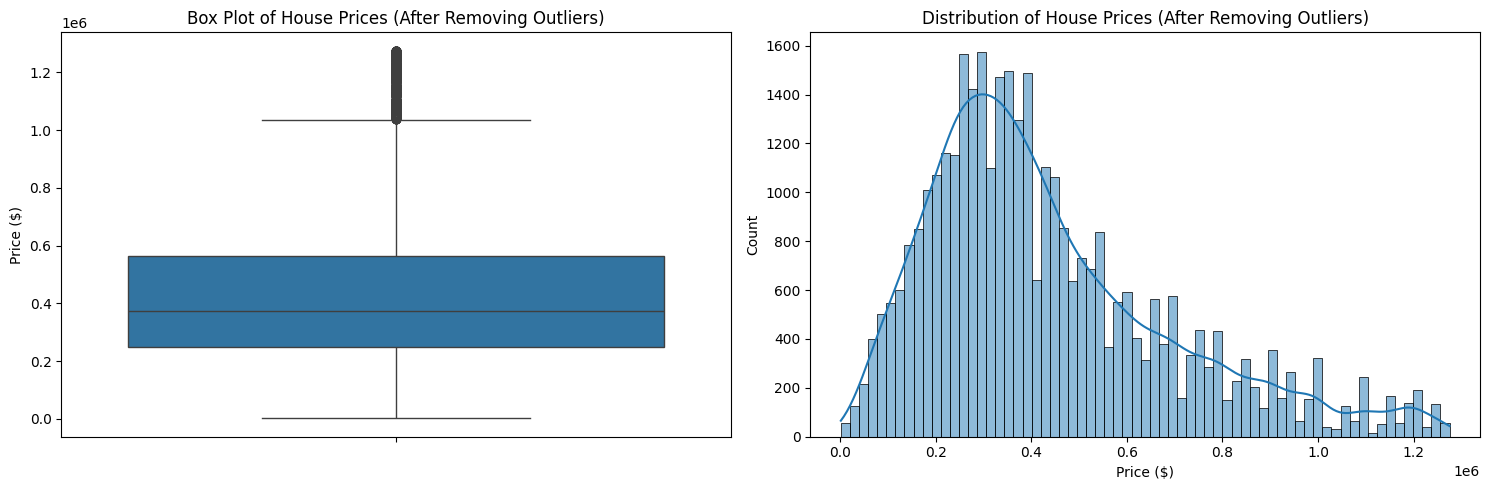


Summary Statistics for Price (After Removing Outliers):
count    3.552500e+04
mean     4.355545e+05
std      2.585083e+05
min      1.800000e+03
25%      2.500000e+05
50%      3.750000e+05
75%      5.650000e+05
max      1.275000e+06
Name: Price, dtype: float64


In [8]:
# Calculate outlier bounds using IQR method
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Print the shape before and after removing outliers
print(f"Shape of dataset before removing outliers: {df.shape}")
print(f"Shape of dataset after removing outliers: {df_cleaned.shape}")
print(f"Number of outliers removed: {len(df) - len(df_cleaned)}")

# Visualize the price distribution after removing outliers
plt.figure(figsize=(15, 5))

# Box plot after removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(y=df_cleaned['Price'])
plt.title('Box Plot of House Prices (After Removing Outliers)')
plt.ylabel('Price ($)')

# Histogram with KDE after removing outliers
plt.subplot(1, 2, 2)
sns.histplot(data=df_cleaned, x='Price', kde=True)
plt.title('Distribution of House Prices (After Removing Outliers)')
plt.xlabel('Price ($)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Print summary statistics of cleaned data
print("\nSummary Statistics for Price (After Removing Outliers):")
print(df_cleaned['Price'].describe())

# Reassign the cleaned dataset to df
df = df_cleaned.copy()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    """Trains and evaluates a regression model, returning performance metrics."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    return {'Model': model_name, 'R² Score': r2, 'RMSE': rmse, 'MAE': mae, 'MAPE (%)': mape}


# 1. Encode Categorical Features
categorical_features = ['Address', 'City', 'State', 'County']
df_encoded = df.copy()
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col + '_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

# 2. Prepare Data
X = df_encoded.drop(['Price', 'Address', 'City', 'State', 'County'], axis=1)
y = df_encoded['Price']

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 4. Scale Numerical Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Define Models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

# 6. Train and Evaluate Models
results = []
for name, model in models.items():
    print(f"Training {name}...")
    metrics = train_and_evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test, name)
    results.append(metrics)

# 7. Display Results
results_df = pd.DataFrame(results).round(2)
print("\nModel Performance Comparison:")
print(results_df.to_string(index=False))

# 8. Identify Best Model
best_model = results_df.loc[results_df['R² Score'].idxmax()]
print(f"\nBest Performing Model: {best_model['Model']}")
print(f"R² Score: {best_model['R² Score']:.4f}")
print(f"RMSE: ${best_model['RMSE']:,.2f}")
print(f"MAE: ${best_model['MAE']:,.2f}")
print(f"MAPE: {best_model['MAPE (%)']:.2f}%")

# 9. Feature Importance (for tree-based models)
if best_model['Model'] in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
    print("\nFeature Importance:")
    best_model_obj = models[best_model['Model']]
    importance = best_model_obj.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    }).sort_values('Importance', ascending=False)
    print(feature_importance_df.to_string(index=False))

Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training SVR...

Model Performance Comparison:
            Model  R² Score      RMSE       MAE  MAPE (%)
Linear Regression      0.49 185850.00 121234.87     48.01
 Ridge Regression      0.49 185844.16 121233.35     48.01
 Lasso Regression      0.49 185849.42 121234.59     48.01
    Decision Tree      0.63 158369.72 103013.78     40.91
    Random Forest      0.81 114326.31  76009.57     31.63
Gradient Boosting      0.76 126921.35  89634.11     36.79
              SVR     -0.05 266186.10 196248.62     73.30

Best Performing Model: Random Forest
R² Score: 0.8100
RMSE: $114,326.31
MAE: $76,009.57
MAPE: 31.63%

Feature Importance:
                Feature  Importance
Median Household Income    0.274367
           Living Space    0.253368
               Zip Code    0.099648
              Longitude    0.070841
       Zip Code 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1d01582e-1e8f-4729-9cfb-0a541dbca97c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>